In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("job_salary.csv")
df.head()

,Company,Job,Degree,More_Than_100000$_Salary(USD)
0,google,Software Engineer,Bachelor's,0
1,google,Product Manager,Bachelor's,1
2,google,Data Scientist,Master's,1
3,abcpharma,Pharmaceutical Sales Manager,Bachelor's,1
4,abcpharma,Clinical Research Scientist,Master's,1


In [2]:
input = df.drop('More_Than_100000$_Salary(USD)',axis='columns')
target = df['More_Than_100000$_Salary(USD)']


In [3]:

from sklearn.preprocessing import LabelEncoder

In [4]:
le_company = LabelEncoder()
le_Job = LabelEncoder()
le_Degree =LabelEncoder()

In [7]:
input['Company_n'] = le_company.fit_transform(input['Company'])
input['job_n'] = le_company.fit_transform(input['Job'])
input['degree_n'] = le_company.fit_transform(input['Degree'])
input.head()

,Company,Job,Degree,company_n,Company_n,job_n,degree_n
0,google,Software Engineer,Bachelor's,8,8,48,0
1,google,Product Manager,Bachelor's,8,8,40,0
2,google,Data Scientist,Master's,8,8,20,2
3,abcpharma,Pharmaceutical Sales Manager,Bachelor's,6,6,37,0
4,abcpharma,Clinical Research Scientist,Master's,6,6,10,2


In [9]:
input_n=input.drop(['Company','Job','Degree'],axis='columns')
input_n

,company_n,Company_n,job_n,degree_n
0,8,8,48,0
1,8,8,40,0
2,8,8,20,2
3,6,6,37,0
4,6,6,10,2
...,...,...,...,...
69,4,4,33,4
70,4,4,46,1
71,4,4,7,3
72,4,4,15,1


In [10]:
from sklearn import tree

In [11]:
model=tree.DecisionTreeClassifier()

In [12]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [13]:
model.score(input_n,target)

1.0

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(input_n, target, test_size=0.2, random_state=42)

In [19]:
model_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [20]:
model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [21]:
y_pred_gini = model_gini.predict(X_test)
y_pred_entropy = model_entropy.predict(X_test)

In [22]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

Accuracy (Gini): 0.60
Accuracy (Entropy): 0.53

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.57      0.57      0.57         7

    accuracy                           0.60        15
   macro avg       0.60      0.60      0.60        15
weighted avg       0.60      0.60      0.60        15


Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.50      0.57      0.53         7

    accuracy                           0.53        15
   macro avg       0.54      0.54      0.53        15
weighted avg       0.54      0.53      0.53        15



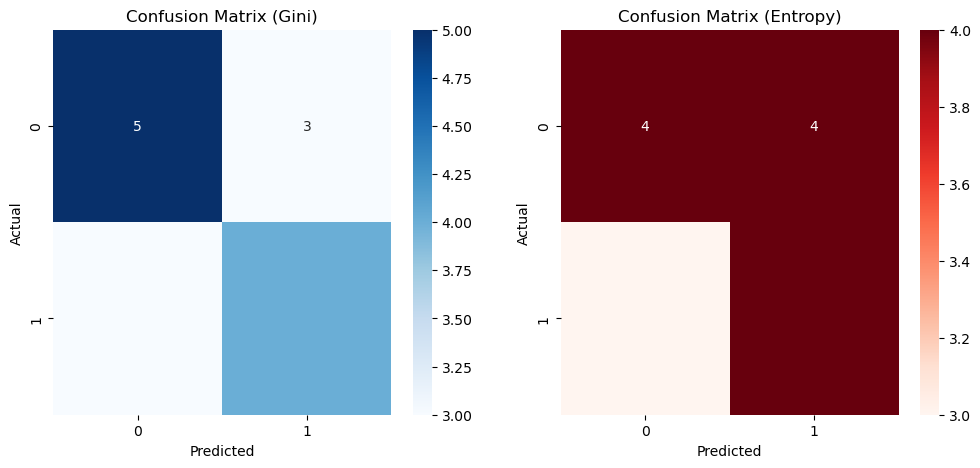

In [23]:
print(f"Accuracy (Gini): {accuracy_gini:.2f}")
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

# Confusion Matrix
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

# Classification Report
print("\nClassification Report (Gini):\n", classification_report(y_test, y_pred_gini))
print("\nClassification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))

# Visualizing Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_gini, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Gini)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_entropy, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Confusion Matrix (Entropy)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

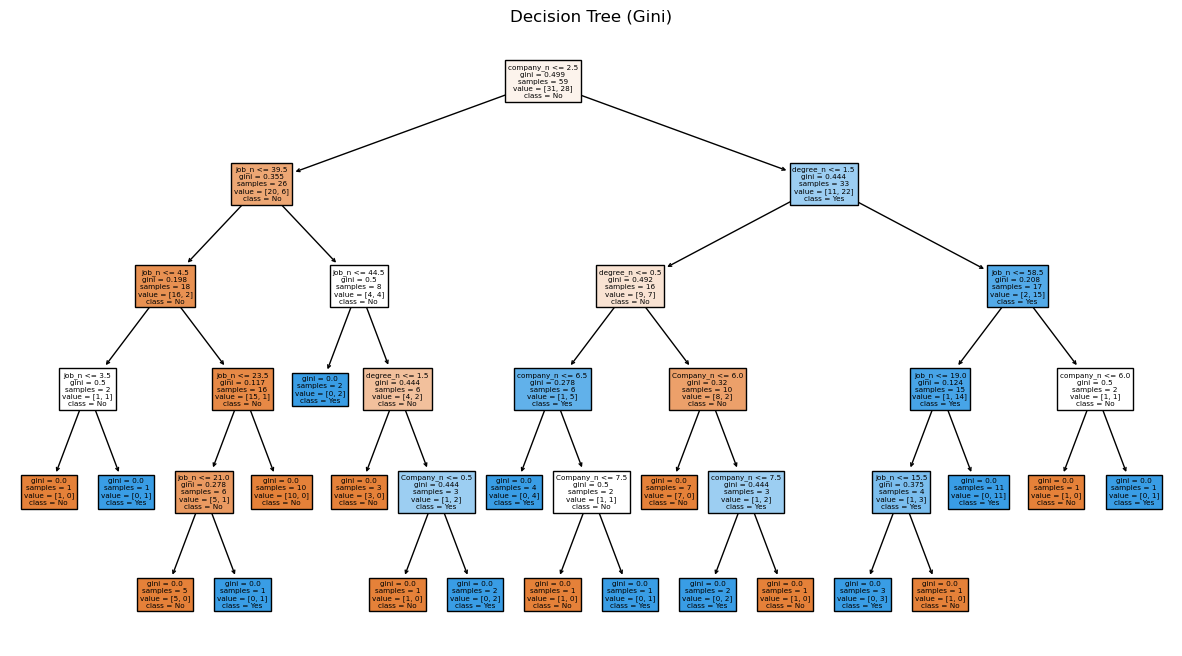

In [25]:
plt.figure(figsize=(15, 8))
plot_tree(model_gini, feature_names=input_n.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Gini)")
plt.show()



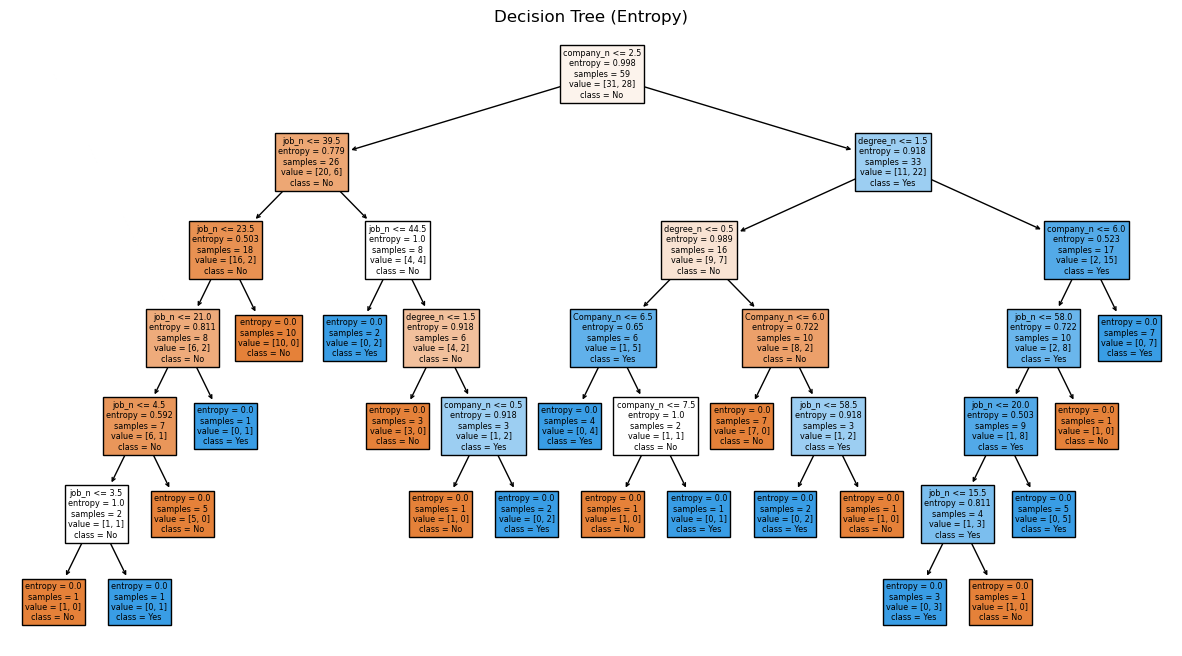

In [26]:
plt.figure(figsize=(15, 8))
plot_tree(model_entropy, feature_names=input_n.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()